In [1]:
import pandas as pd
import numpy as np
import geopandas
import matplotlib.pyplot as plt
import seaborn as sns

#élargissement de la visualisation des tableaux pandas
pd.set_option('display.max_columns', None)

#suppression des warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
lille = pd.read_csv('../files/lille.csv', dtype={'CODGEO': 'string'}).drop(['Unnamed: 0'], axis=1)

In [3]:
lille.head()

,REG,DEP,CODGEO,LIBGEO,AAV20,LIBAAV2,CATEAAV,LIBCATE,TAAV20,LIBTAAV,geometry,TP6020
0,32,59,59004,Aix-en-Pévèle,4,Lille (partie française),20,Commune de la couronne,4,Aire de 700 000 habitants ou plus (hors Paris),"POLYGON ((721369.9878845015 7043362.99917782, ...",NaN
1,32,59,59005,Allennes-les-Marais,4,Lille (partie française),20,Commune de la couronne,4,Aire de 700 000 habitants ou plus (hors Paris),"POLYGON ((697388.0062234758 7047846.991005516,...",NaN
2,32,59,59009,Villeneuve-d'Ascq,4,Lille (partie française),12,Autre commune du pôle principal,4,Aire de 700 000 habitants ou plus (hors Paris),"POLYGON ((709781.9555139567 7056024.037434147,...",20.0
3,32,59,59011,Annoeullin,4,Lille (partie française),20,Commune de la couronne,4,Aire de 700 000 habitants ou plus (hors Paris),"POLYGON ((694804.0377138064 7045612.03069271, ...",10.0
4,32,59,59013,Anstaing,4,Lille (partie française),20,Commune de la couronne,4,Aire de 700 000 habitants ou plus (hors Paris),"POLYGON ((713627.9552680049 7055150.951253223,...",NaN


In [4]:
gdf = geopandas.read_file('../files/fond_AAV2020_geo20_metro/zMetro.shp')

In [5]:
data = lille[['CODGEO', 'TP6020']]
gdf_data = gdf.merge(data, how='left', on='CODGEO')
gdf_data_aav = gdf_data[gdf_data.LIBAAV2 == 'Lille (partie française)'].reset_index(drop=True)

### A CORRIGER !!!! ###

In [6]:
#gdf_data_aav.TP6020 = gdf_data.TP6020.replace(np.nan, 5.01)

In [7]:
gdf_data_aav.head()

,REG,DEP,CODGEO,LIBGEO,AAV20,LIBAAV2,CATEAAV,LIBCATE,TAAV20,LIBTAAV,geometry,TP6020
0,32,59,59004,Aix-en-Pévèle,004,Lille (partie française),20,Commune de la couronne,4,Aire de 700 000 habitants ou plus (hors Paris),"POLYGON ((721369.988 7043362.999, 719565.954 7...",NaN
1,32,59,59005,Allennes-les-Marais,004,Lille (partie française),20,Commune de la couronne,4,Aire de 700 000 habitants ou plus (hors Paris),"POLYGON ((697388.006 7047846.991, 696458.984 7...",NaN
2,32,59,59009,Villeneuve-d'Ascq,004,Lille (partie française),12,Autre commune du pôle principal,4,Aire de 700 000 habitants ou plus (hors Paris),"POLYGON ((709781.956 7056024.037, 708545.001 7...",20.0
3,32,59,59011,Annoeullin,004,Lille (partie française),20,Commune de la couronne,4,Aire de 700 000 habitants ou plus (hors Paris),"POLYGON ((694804.038 7045612.031, 694065.972 7...",10.0
4,32,59,59013,Anstaing,004,Lille (partie française),20,Commune de la couronne,4,Aire de 700 000 habitants ou plus (hors Paris),"POLYGON ((713627.955 7055150.951, 713252.966 7...",NaN


<AxesSubplot:>

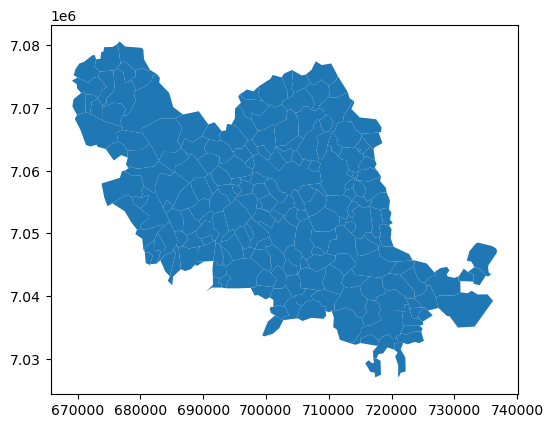

In [8]:
gdf_data_aav.plot()

In [9]:
gdf_data_aav.crs

<Projected CRS: PROJCS["Lambert_Conformal_Conic",GEOGCS["GCS_GRS 1 ...>
Name: Lambert_Conformal_Conic
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Lambert Conic Conformal (2SP)
Datum: D_unknown
- Ellipsoid: GRS80
- Prime Meridian: Greenwich

In [10]:
# Use WGS 84 (epsg:4326) as the geographic coordinate system
df = gdf_data_aav.to_crs(epsg=4326)
print(df.crs)
df.head()



EPSG:4326


,REG,DEP,CODGEO,LIBGEO,AAV20,LIBAAV2,CATEAAV,LIBCATE,TAAV20,LIBTAAV,geometry,TP6020
0,32,59,59004,Aix-en-Pévèle,004,Lille (partie française),20,Commune de la couronne,4,Aire de 700 000 habitants ou plus (hors Paris),"POLYGON ((3.30067 50.48728, 3.27530 50.48988, ...",NaN
1,32,59,59005,Allennes-les-Marais,004,Lille (partie française),20,Commune de la couronne,4,Aire de 700 000 habitants ou plus (hors Paris),"POLYGON ((2.96322 50.52788, 2.95014 50.52369, ...",NaN
2,32,59,59009,Villeneuve-d'Ascq,004,Lille (partie française),12,Autre commune du pôle principal,4,Aire de 700 000 habitants ou plus (hors Paris),"POLYGON ((3.13794 50.60120, 3.12054 50.61847, ...",20.0
3,32,59,59011,Annoeullin,004,Lille (partie française),20,Commune de la couronne,4,Aire de 700 000 habitants ou plus (hors Paris),"POLYGON ((2.92687 50.50781, 2.91646 50.52023, ...",10.0
4,32,59,59013,Anstaing,004,Lille (partie française),20,Commune de la couronne,4,Aire de 700 000 habitants ou plus (hors Paris),"POLYGON ((3.19214 50.59330, 3.18688 50.59860, ...",NaN


In [11]:
df.to_csv('lille_folium.csv', index=False)
df.to_file('lille_folium.shp') 

df.to_file('lille_folium.geojson', driver='GeoJSON')

In [12]:
import folium

In [13]:
m = folium.Map(location=[50.62, 3.05], zoom_start=10, tiles="CartoDB positron")
m



In [14]:
for _, r in df.iterrows():
    # Without simplifying the representation of each borough,
    # the map might not be displayed
    sim_geo = geopandas.GeoSeries(r["geometry"]).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j, style_function=lambda x: {"fillColor": "orange"})
    folium.Popup(r["LIBGEO"]).add_to(geo_j)
    geo_j.add_to(m)
m

In [16]:
test = geopandas.read_file('lille_folium.geojson')

In [17]:
test

,REG,DEP,CODGEO,LIBGEO,AAV20,LIBAAV2,CATEAAV,LIBCATE,TAAV20,LIBTAAV,TP6020,geometry
0,32,59,59004,Aix-en-Pévèle,004,Lille (partie française),20,Commune de la couronne,4,Aire de 700 000 habitants ou plus (hors Paris),NaN,"POLYGON ((3.30067 50.48728, 3.27530 50.48988, ..."
1,32,59,59005,Allennes-les-Marais,004,Lille (partie française),20,Commune de la couronne,4,Aire de 700 000 habitants ou plus (hors Paris),NaN,"POLYGON ((2.96322 50.52788, 2.95014 50.52369, ..."
2,32,59,59009,Villeneuve-d'Ascq,004,Lille (partie française),12,Autre commune du pôle principal,4,Aire de 700 000 habitants ou plus (hors Paris),20.0,"POLYGON ((3.13794 50.60120, 3.12054 50.61847, ..."
3,32,59,59011,Annoeullin,004,Lille (partie française),20,Commune de la couronne,4,Aire de 700 000 habitants ou plus (hors Paris),10.0,"POLYGON ((2.92687 50.50781, 2.91646 50.52023, ..."
4,32,59,59013,Anstaing,004,Lille (partie française),20,Commune de la couronne,4,Aire de 700 000 habitants ou plus (hors Paris),NaN,"POLYGON ((3.19214 50.59330, 3.18688 50.59860, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
196,32,62,62706,Richebourg,004,Lille (partie française),20,Commune de la couronne,4,Aire de 700 000 habitants ou plus (hors Paris),7.0,"POLYGON ((2.77133 50.55715, 2.76742 50.55936, ..."
197,32,62,62736,Sailly-sur-la-Lys,004,Lille (partie française),20,Commune de la couronne,4,Aire de 700 000 habitants ou plus (hors Paris),6.0,"POLYGON ((2.79245 50.63366, 2.75916 50.65068, ..."
198,32,62,62851,Vieille-Chapelle,004,Lille (partie française),20,Commune de la couronne,4,Aire de 700 000 habitants ou plus (hors Paris),NaN,"POLYGON ((2.71733 50.58249, 2.70224 50.58958, ..."
199,32,62,62863,Violaines,004,Lille (partie française),20,Commune de la couronne,4,Aire de 700 000 habitants ou plus (hors Paris),10.0,"POLYGON ((2.75549 50.50382, 2.76460 50.52180, ..."
